In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("spam.csv", encoding="latin-1")
df.drop(columns=["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], inplace=True)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df.columns = ["target", "text"]
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df["target"] = encoder.fit_transform(df["target"])
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [6]:
df.duplicated().sum()

403

In [7]:
df = df.drop_duplicates()

In [8]:
df.duplicated().sum()

0

In [9]:
df["target"].value_counts()

0    4516
1     653
Name: target, dtype: int64

In [10]:
# inbalanced resampling

In [11]:
import nltk

In [12]:
df["num_words"] = df["text"].apply(lambda x: len(nltk.word_tokenize(x)))
df.head()

,target,text,num_words
0,0,"Go until jurong point, crazy.. Available only ...",24
1,0,Ok lar... Joking wif u oni...,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37
3,0,U dun say so early hor... U c already then say...,13
4,0,"Nah I don't think he goes to usf, he lives aro...",15


In [13]:
df["num_sentences"] = df["text"].apply(lambda x: len(nltk.sent_tokenize(x)))
df.head()

,target,text,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",24,2
1,0,Ok lar... Joking wif u oni...,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37,2
3,0,U dun say so early hor... U c already then say...,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",15,1


In [14]:
df[["num_words", "num_sentences"]].describe()

,num_words,num_sentences
count,5169.000000,5169.000000
mean,18.455794,1.965564
std,13.324758,1.448541
min,1.000000,1.000000
25%,9.000000,1.000000
50%,15.000000,1.000000
75%,26.000000,2.000000
max,220.000000,38.000000


In [15]:
df[df["target"] == 0][["num_words", "num_sentences"]].describe()

,num_words,num_sentences
count,4516.000000,4516.000000
mean,17.123782,1.820195
std,13.493970,1.383657
min,1.000000,1.000000
25%,8.000000,1.000000
50%,13.000000,1.000000
75%,22.000000,2.000000
max,220.000000,38.000000


In [16]:
df[df["target"] == 1][["num_words", "num_sentences"]].describe()

,num_words,num_sentences
count,653.000000,653.000000
mean,27.667688,2.970904
std,7.008418,1.488425
min,2.000000,1.000000
25%,25.000000,2.000000
50%,29.000000,3.000000
75%,32.000000,4.000000
max,46.000000,9.000000


<AxesSubplot: xlabel='num_words', ylabel='Count'>

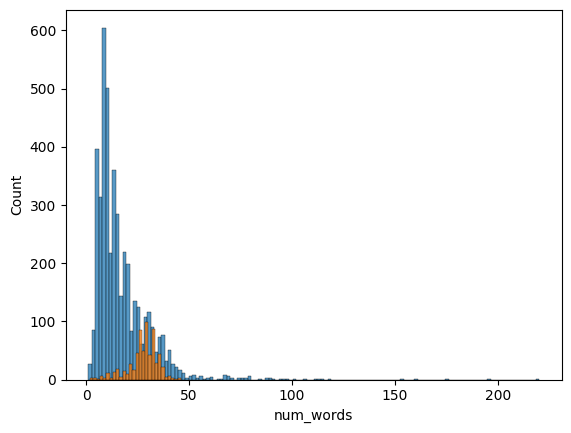

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure()
sns.histplot(df[df["target"] == 0]["num_words"])
sns.histplot(df[df["target"] == 1]["num_words"])

In [18]:
import re
import string

In [19]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

# df["text_clean"] = df["text"].apply(clean_text)
# df.head()

In [20]:
from nltk.corpus import stopwords

In [21]:
stop_words = stopwords.words("english") + ["u", "im", "c"]

def remove_stopwords(text):
    text = " ".join(word for word in text.split() if word not in stop_words)
    return text

# df["text_clean"] = df["text_clean"].apply(remove_stopwords)
# df.head()

In [22]:
stemmer = nltk.SnowballStemmer("english")

def stem_text(text):
    text = " ".join(stemmer.stem(word) for word in text.split())
    return text

# df["text_clean"] = df["text_clean"].apply(stem_text)
# df.head()

In [23]:
def preprocess_text(text):
    text = clean_text(text)
    text = " ".join(word for word in text.split() if word not in stop_words)
    text = " ".join(stemmer.stem(word) for word in text.split())
    return text

df["text_clean"] = df["text"].apply(preprocess_text)
df.head()

,target,text,num_words,num_sentences,text_clean
0,0,"Go until jurong point, crazy.. Available only ...",24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,8,2,ok lar joke wif oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37,2,free entri wkli comp win fa cup final tkts may...
3,0,U dun say so early hor... U c already then say...,13,1,dun say earli hor alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",15,1,nah dont think goe usf live around though


In [24]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

x = tfidf.fit_transform(df["text_clean"]).toarray()

In [25]:
from sklearn.model_selection import train_test_split

y = df["target"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [26]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

gnb.fit(x_train, y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8723404255319149
[[794 102]
 [ 30 108]]
0.5142857142857142


In [27]:
mnb.fit(x_train, y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [28]:
bnb.fit(x_train, y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9758220502901354
[[893   3]
 [ 22 116]]
0.9747899159663865


In [29]:
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

svc = SVC(kernel="sigmoid", gamma=1.0)
mnb = MultinomialNB()
dtc = DecisionTreeClassifier()
knc = KNeighborsClassifier()
lrc = LogisticRegression(solver="liblinear", penalty="l1")
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbc = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

classifiers = {"SVC": svc,
              "MultinomialNB": mnb,
              "DecisionTreeClassifier": dtc,
              "KNeighborsClassifier": knc,
              "LogisticRegression": lrc,
              "RandomForestClassifier": rfc,
              "AdaBoostClassifier": abc,
              "BaggingClassifier": bc,
              "ExtraTreesClassifier": etc,
              "GradientBoostingClassifier": gbc,
              "XGBClassifier": xgb}

def train_classifier(classifier, x_train, y_train, x_test, y_test):
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    return accuracy, precision
    
accuracy_scores = []
precision_scores = []

for name, classifier in classifiers.items():
    accuracy, precision = train_classifier(classifier, x_train, y_train, x_test, y_test)
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    print(name)
    print("Accuracy: ", accuracy)
    print("Precision: ", precision)

SVC
Accuracy:  0.971953578336557
Precision:  0.9658119658119658
MultinomialNB
Accuracy:  0.9709864603481625
Precision:  1.0
DecisionTreeClassifier
Accuracy:  0.9535783365570599
Precision:  0.8461538461538461
KNeighborsClassifier
Accuracy:  0.9081237911025145
Precision:  1.0
LogisticRegression
Accuracy:  0.9545454545454546
Precision:  0.9595959595959596
RandomForestClassifier
Accuracy:  0.9700193423597679
Precision:  0.9819819819819819
AdaBoostClassifier
Accuracy:  0.9613152804642167
Precision:  0.9537037037037037
BaggingClassifier
Accuracy:  0.9545454545454546
Precision:  0.864
ExtraTreesClassifier
Accuracy:  0.9700193423597679
Precision:  0.9421487603305785
GradientBoostingClassifier
Accuracy:  0.9468085106382979
Precision:  0.9278350515463918
XGBClassifier
Accuracy:  0.9680851063829787
Precision:  0.9487179487179487


In [30]:
from keras.preprocessing.text import Tokenizer

texts = df["text_clean"]
target = df["target"]

word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(texts)

num_vocab = len(word_tokenizer.word_index) + 1
print(num_vocab)

2023-04-09 17:39:35.481524: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


6767


In [31]:
from keras_preprocessing.sequence import pad_sequences
from nltk.tokenize import word_tokenize

def embedding(corpus):
    return word_tokenizer.texts_to_sequences(corpus)

longest_train = max(texts, key=lambda sentence: len(word_tokenize(sentence)))
length_longest = len(word_tokenize(longest_train))

train_padded_sentences = pad_sequences(embedding(texts), length_longest, padding="post")
print(train_padded_sentences)

[[   2 2903  264 ...    0    0    0]
 [   8  222  548 ...    0    0    0]
 [  10  399  774 ...    0    0    0]
 ...
 [6765 1360 6766 ...    0    0    0]
 [ 135 1169 1498 ...    0    0    0]
 [1844  422  183 ...    0    0    0]]


In [32]:
embeddings_dict = {}
embedding_dim = 100

with open("glove.6B.100d.txt") as fp:
    for line in fp.readlines():
        records = line.split()
        word = records[0]
        vector_dimensions = np.asarray(records[1:], dtype="float32")
        embeddings_dict[word] = vector_dimensions

embedding_matrix = np.zeros((num_vocab, embedding_dim))

for word, idx in word_tokenizer.word_index.items():
    embedding_vector = embeddings_dict.get(word)
    if embedding_vector is not None:
        embedding_matrix[idx] = embedding_vector
        
print(embedding_matrix)

[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [-0.57832998 -0.0036551   0.34658    ...  0.070204    0.44509
   0.24147999]
 [-0.078894    0.46160001  0.57779002 ...  0.26352     0.59397
   0.26741001]
 ...
 [ 0.63009    -0.036992    0.24052    ...  0.10029     0.056822
   0.25018999]
 [-0.12002    -1.23870003 -0.23303001 ...  0.13658001 -0.61848003
   0.049843  ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]


In [33]:
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import (LSTM, 
                          Embedding, 
                          BatchNormalization,
                          Dense, 
                          TimeDistributed, 
                          Dropout, 
                          Bidirectional,
                          Flatten, 
                          GlobalMaxPool1D)

x_train, x_test, y_train, y_test = train_test_split(train_padded_sentences, target, test_size=0.25)

def glove_lstm():
    model = Sequential()
    
    model.add(Embedding(
        input_dim=embedding_matrix.shape[0], 
        output_dim=embedding_matrix.shape[1],
        weights=[embedding_matrix],
        input_length=length_longest))
    
    model.add(Bidirectional(LSTM(
        length_longest,
        return_sequences=True,
        recurrent_dropout=0.2)))
    
    model.add(GlobalMaxPool1D())
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(length_longest, activation="relu"))
    model.add(Dropout(0.5))
    model.add(Dense(length_longest, activation="relu"))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])
    
    return model

model = glove_lstm()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 80, 100)           676700    
                                                                 
 bidirectional (Bidirectiona  (None, 80, 160)          115840    
 l)                                                              
                                                                 
 global_max_pooling1d (Globa  (None, 160)              0         
 lMaxPooling1D)                                                  
                                                                 
 batch_normalization (BatchN  (None, 160)              640       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 160)               0         
                                                        

In [34]:
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

model = glove_lstm()

checkpoint = ModelCheckpoint(
    "model.h5",
    monitor="val_loss",
    verbose=1,
    save_best_only=True)

reduce_lr = ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.2,
    verbose=1,
    patience=5,
    min_lr=0.001)

history = model.fit(
    x_train,
    y_train,
    epochs=7,
    batch_size=32,
    validation_data=(x_test, y_test),
    verbose=1,
    callbacks=[reduce_lr, checkpoint])

Epoch 1/7
121/122 [============================>.] - ETA: 0s - loss: 0.3400 - accuracy: 0.8778
Epoch 1: val_loss improved from inf to 0.38962, saving model to model.h5
122/122 [==============================] - 11s 65ms/step - loss: 0.3402 - accuracy: 0.8777 - val_loss: 0.3896 - val_accuracy: 0.9350 - lr: 0.0010
Epoch 2/7
121/122 [============================>.] - ETA: 0s - loss: 0.2139 - accuracy: 0.9248
Epoch 2: val_loss improved from 0.38962 to 0.28743, saving model to model.h5
122/122 [==============================] - 7s 61ms/step - loss: 0.2137 - accuracy: 0.9249 - val_loss: 0.2874 - val_accuracy: 0.9273 - lr: 0.0010
Epoch 3/7
122/122 [==============================] - ETA: 0s - loss: 0.1471 - accuracy: 0.9507
Epoch 3: val_loss improved from 0.28743 to 0.09617, saving model to model.h5
122/122 [==============================] - 7s 59ms/step - loss: 0.1471 - accuracy: 0.9507 - val_loss: 0.0962 - val_accuracy: 0.9644 - lr: 0.0010
Epoch 4/7
122/122 [==============================] -

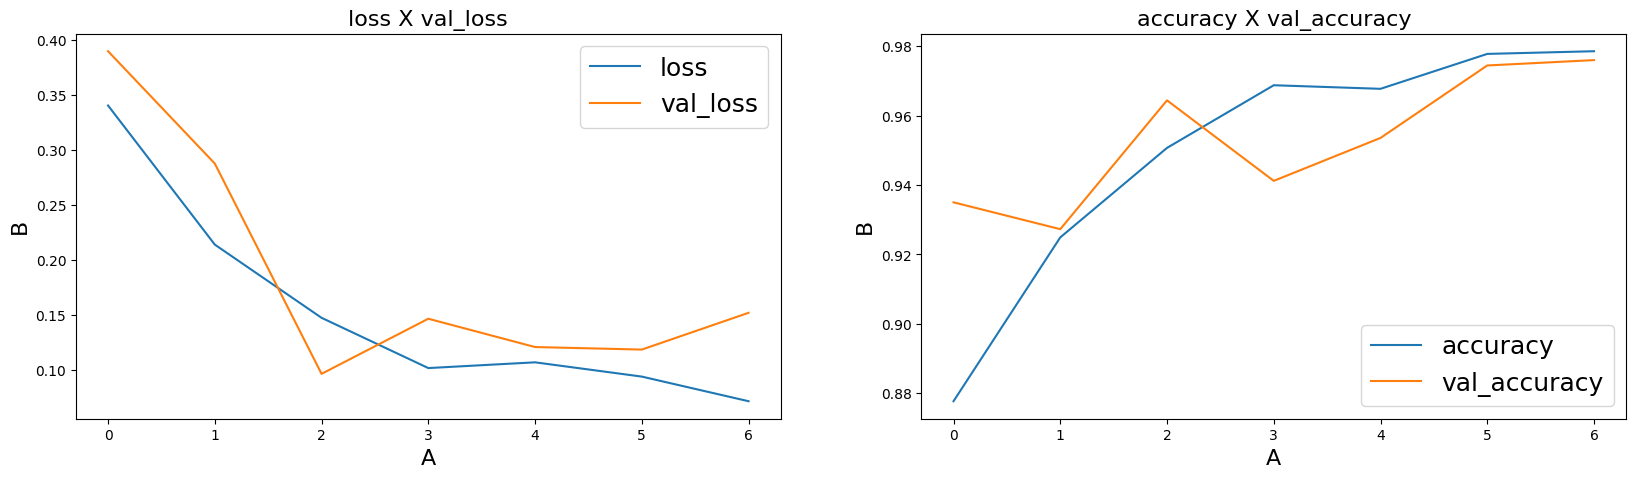

In [35]:
def plot_learning_curves(history, arr):
    fig, ax = plt.subplots(1, 2, figsize=(20, 5))
    for idx in range(2):
        ax[idx].plot(history.history[arr[idx][0]])
        ax[idx].plot(history.history[arr[idx][1]])
        ax[idx].legend([arr[idx][0], arr[idx][1]], fontsize=18)
        ax[idx].set_xlabel("A", fontsize=16)
        ax[idx].set_ylabel("B", fontsize=16)
        ax[idx].set_title(arr[idx][0] + " X " + arr[idx][1], fontsize=16)
        
plot_learning_curves(history, [["loss", "val_loss"], ["accuracy", "val_accuracy"]])

In [36]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained("bert-large-uncased")

def bert_encode(data, maximum_length):
    input_ids = []
    attention_masks = []
    
    for text in data:
        encoded = tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=maximum_length,
            pad_to_max_length=True,
            return_attention_mask=True,
            truncation=True)
        input_ids.append(encoded["input_ids"])
        attention_masks.append(encoded["attention_mask"])
    
    return np.array(input_ids), np.array(attention_masks)

texts = df["text_clean"]
target = df["target"]

train_input_ids, train_attention_masks = bert_encode(texts, 60)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:2346: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [37]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam

def create_model(bert_model):
    input_ids = tf.keras.Input(shape=(60,), dtype="int32")
    attention_masks = tf.keras.Input(shape=(60,), dtype="int32")
    
    output = bert_model([input_ids, attention_masks])
    output = output[1]
    output = tf.keras.layers.Dense(32, activation="relu")(output)
    output = tf.keras.layers.Dropout(0.2)(output)
    output = tf.keras.layers.Dense(1, activation="sigmoid")(output)
    
    model = tf.keras.models.Model(inputs=[input_ids, attention_masks], outputs=output)
    model.compile(Adam(learning_rate=1e-5), loss="binary_crossentropy", metrics=["accuracy"])
    return model

from transformers import TFBertModel
bert_model = TFBertModel.from_pretrained("bert-base-uncased")

model = create_model(bert_model)
model.summary()

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 60)]         0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 60)]         0           []                               
                                                                                                  
 tf_bert_model (TFBertModel)    TFBaseModelOutputWi  109482240   ['input_1[0][0]',                
                                thPoolingAndCrossAt               'input_2[0][0]']                
                                tentions(last_hidde                                               
                                n_state=(None, 60,                                            

Epoch 1/3
414/414 [==============================] - 1037s 2s/step - loss: 0.1537 - accuracy: 0.9475 - val_loss: 0.0664 - val_accuracy: 0.9787
Epoch 2/3
414/414 [==============================] - 1032s 2s/step - loss: 0.0646 - accuracy: 0.9836 - val_loss: 0.0618 - val_accuracy: 0.9778
Epoch 3/3
414/414 [==============================] - 929s 2s/step - loss: 0.0348 - accuracy: 0.9925 - val_loss: 0.0533 - val_accuracy: 0.9845


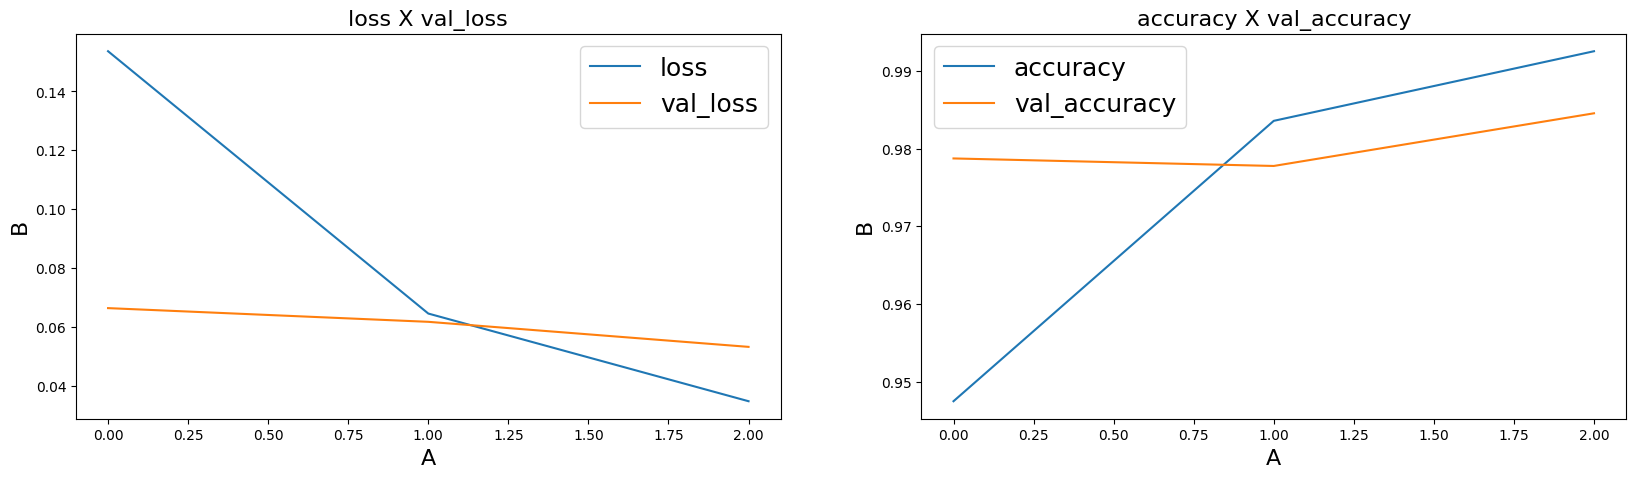

In [38]:
history = model.fit(
    [train_input_ids, train_attention_masks],
    target,
    validation_split=0.2,
    epochs=3,
    batch_size=10)

plot_learning_curves(history, [["loss", "val_loss"], ["accuracy", "val_accuracy"]])